In [1]:
#importing the libraries

from pandas.core.dtypes.cast import NumpyArrayT

import os
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn import svm
from sklearn.datasets import load_iris
from sklearn.metrics import accuracy_score
import csv
import pandas as pd

from sklearn import preprocessing
# make a prediction with a perceptron model on the dataset
from sklearn.datasets import make_classification
from sklearn.linear_model import Perceptron
from sklearn.metrics import confusion_matrix
from sklearn import svm, datasets
from past.builtins import xrange

# **Loading the Static Dataset**

In [2]:
data=pd.read_csv("Static_dataset.csv")

In [ ]:
data

,timestamp,FQDN_count,subdomain_length,upper,lower,numeric,entropy,special,labels,labels_max,labels_average,longest_word,sld,len,subdomain,Target Attack
0,56:19.8,27,10,0,10,11,2.570417,6,6,7,3.666667,2,192,14,1,1
1,07:23.9,27,10,0,10,11,2.767195,6,6,7,3.666667,2,192,14,1,1
2,23:15.1,26,9,0,10,10,2.742338,6,6,7,3.500000,2,192,13,1,0
3,04:51.9,27,10,0,10,11,2.570417,6,6,7,3.666667,2,192,14,1,1
4,12:44.0,15,9,0,11,0,2.929439,4,3,5,4.333333,local,local,15,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
268069,33:51.5,18,3,0,16,0,2.338623,2,3,10,5.333333,alma,almaalomah,14,1,0
268070,36:02.5,27,10,0,10,11,2.767195,6,6,7,3.666667,2,192,14,1,0
268071,37:21.5,27,10,0,10,11,2.767195,6,6,7,3.666667,2,192,14,1,1
268072,24:25.1,16,0,0,14,0,3.249687,2,2,13,7.500000,radio,radio-vintage,14,0,0


Firstly I removed the timestamp column

In [3]:
data.drop(data.columns[[0]], axis=1, inplace=True)

In [ ]:
data

,FQDN_count,subdomain_length,upper,lower,numeric,entropy,special,labels,labels_max,labels_average,longest_word,sld,len,subdomain,Target Attack
0,27,10,0,10,11,2.570417,6,6,7,3.666667,2,192,14,1,1
1,27,10,0,10,11,2.767195,6,6,7,3.666667,2,192,14,1,1
2,26,9,0,10,10,2.742338,6,6,7,3.500000,2,192,13,1,0
3,27,10,0,10,11,2.570417,6,6,7,3.666667,2,192,14,1,1
4,15,9,0,11,0,2.929439,4,3,5,4.333333,local,local,15,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
268069,18,3,0,16,0,2.338623,2,3,10,5.333333,alma,almaalomah,14,1,0
268070,27,10,0,10,11,2.767195,6,6,7,3.666667,2,192,14,1,0
268071,27,10,0,10,11,2.767195,6,6,7,3.666667,2,192,14,1,1
268072,16,0,0,14,0,3.249687,2,2,13,7.500000,radio,radio-vintage,14,0,0


In [4]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
FQDN_count,268074.0,22.286596,6.001205,2.000000,18.000000,24.000000,27.000000,36.000000
subdomain_length,268074.0,6.059021,3.899505,0.000000,3.000000,7.000000,10.000000,23.000000
upper,268074.0,0.845420,4.941929,0.000000,0.000000,0.000000,0.000000,32.000000
lower,268074.0,10.410014,3.207725,0.000000,10.000000,10.000000,10.000000,34.000000
numeric,268074.0,6.497586,4.499866,0.000000,0.000000,8.000000,10.000000,12.000000
entropy,268074.0,2.485735,0.407709,0.219195,2.054029,2.570417,2.767195,4.216847
special,268074.0,4.533577,2.187683,0.000000,2.000000,6.000000,6.000000,7.000000
labels,268074.0,4.788823,1.803256,1.000000,3.000000,6.000000,6.000000,7.000000
labels_max,268074.0,8.252233,4.415355,2.000000,7.000000,7.000000,7.000000,32.000000
labels_average,268074.0,4.802239,4.573066,2.000000,3.166667,3.666667,4.000000,32.000000


## Validate data balanced

In [5]:
data['Target Attack'].value_counts()

1    147179
0    120895
Name: Target Attack, dtype: int64

C:\Users\mm\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Target Attack', ylabel='count'>

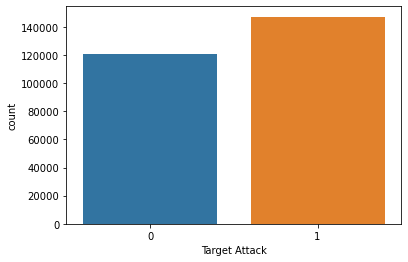

In [6]:
sns.countplot(data['Target Attack'])

firstly create a basic histogram. to divides the value range of continuous variables into discrete bins and shows how many values exist in each bin.

In [11]:
def draw_histogram(X):
  sns.set(style="darkgrid", font_scale=1.2)
  sns.displot(
  data=data,
  x=X,
  kind="hist",
  aspect=1.4
)


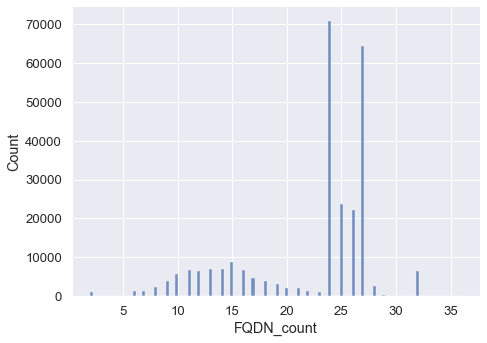

In [12]:
draw_histogram(data['FQDN_count'])

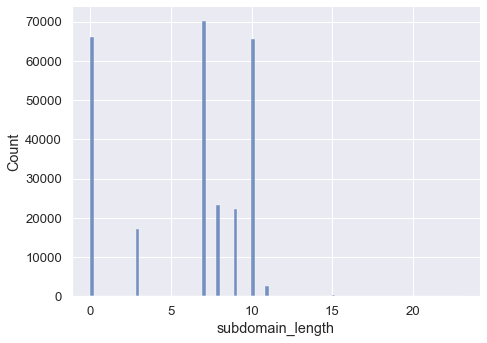

In [13]:
draw_histogram(data['subdomain_length'])

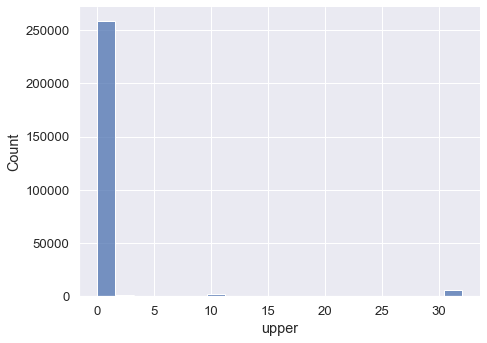

In [14]:
draw_histogram(data['upper'])

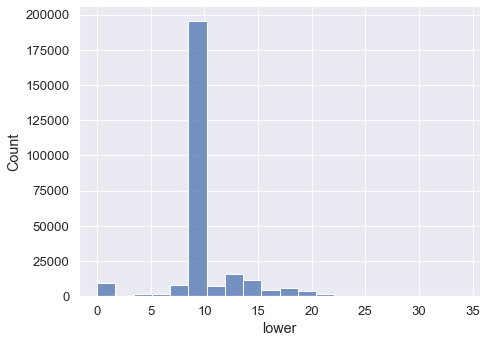

In [15]:
draw_histogram(data['lower'])

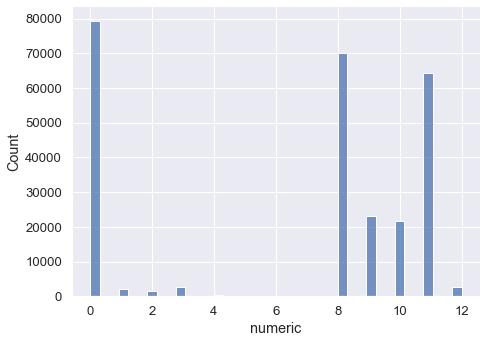

In [16]:
draw_histogram(data['numeric'])

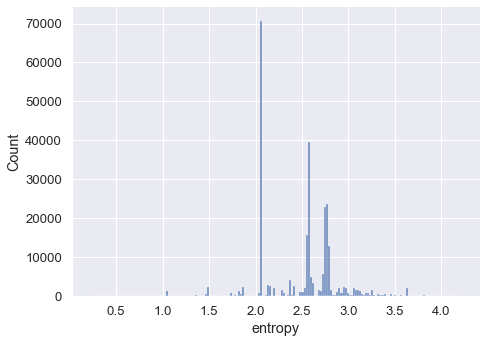

In [17]:
draw_histogram(data['entropy'])

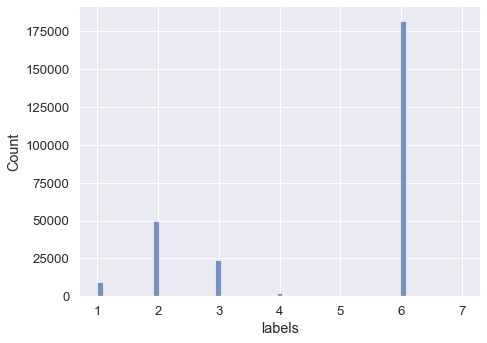

In [18]:
draw_histogram(data['labels'])

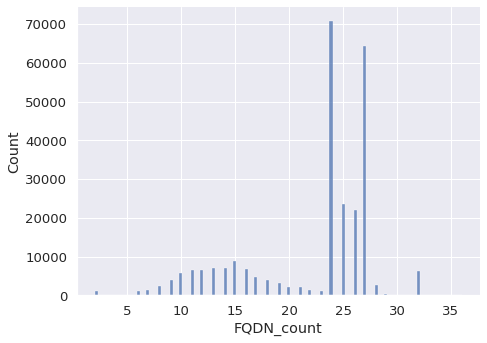

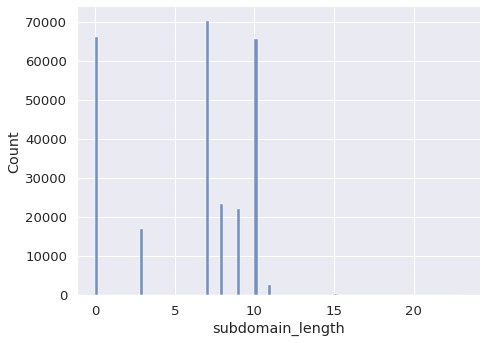

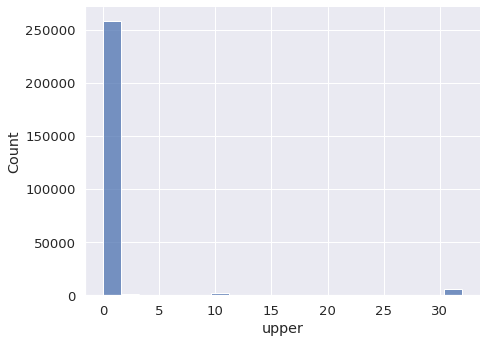

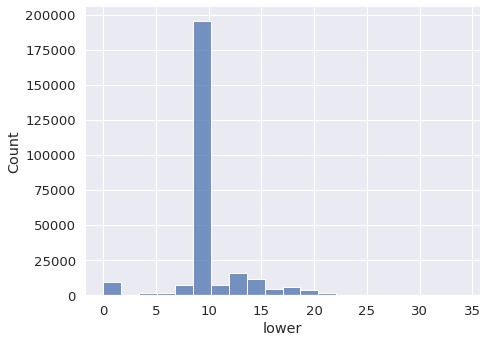

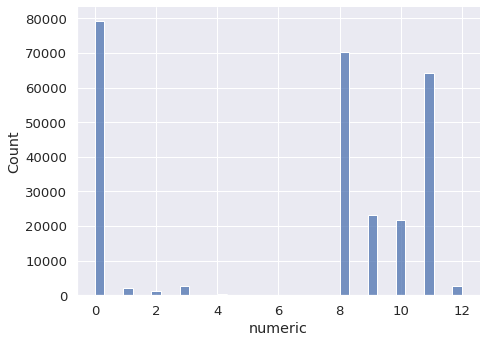

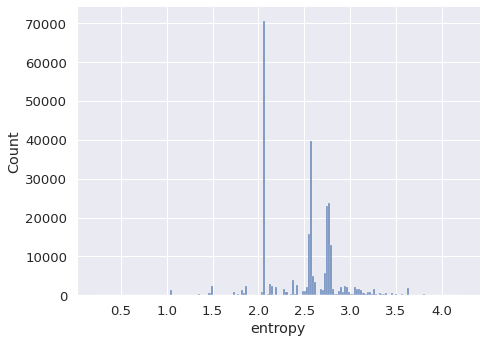

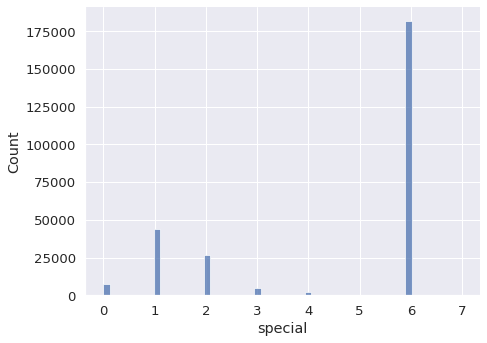

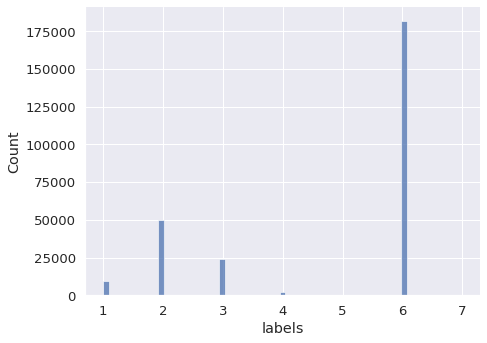

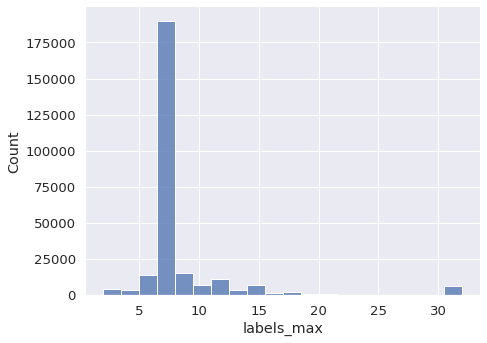

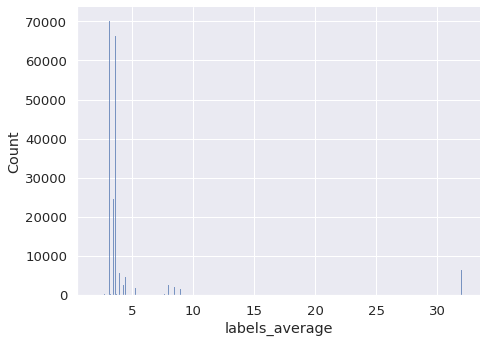

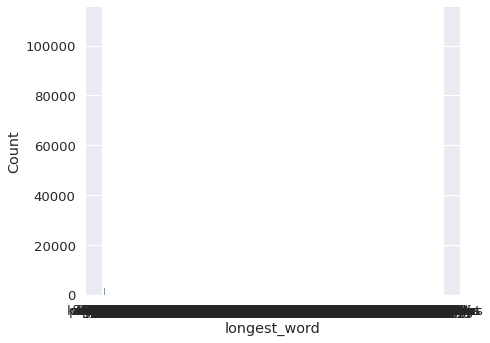

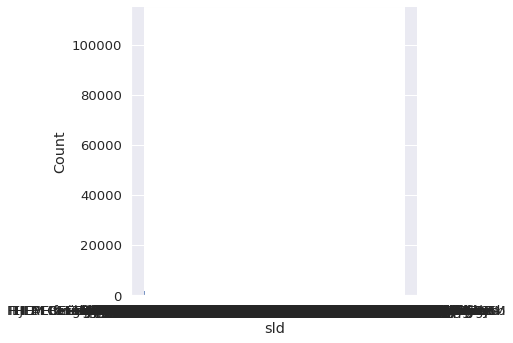

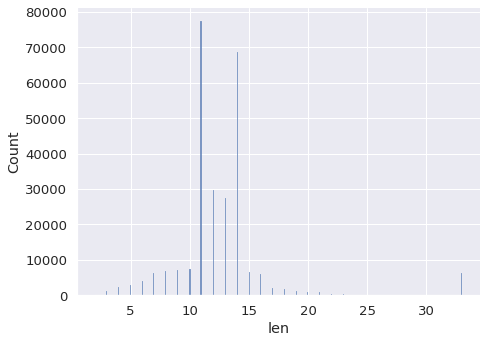

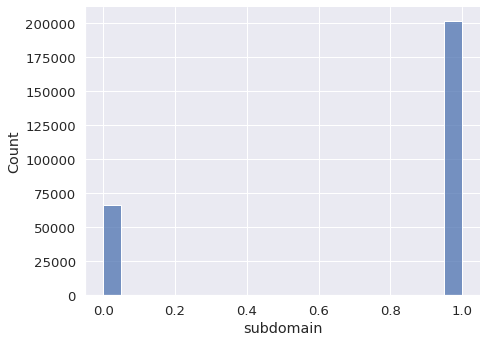

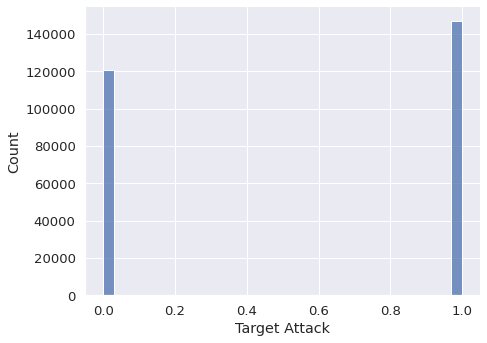

In [ ]:
# Import pandas package 
import pandas as pd  
# iterating the columns
for col in data.columns:
    draw_histogram(col)

We can also adjust the number of bins in the histogram. In some cases, it is preferred to have less number of bins so that we get a more structured overview.

The parameter to use for this adjustment is the bins.

In [ ]:
def draw_number_of_bins(X):
  sns.displot(
  data=data,
  x=X,
  kind="hist",
  aspect=1.4,
  log_scale=10,
  bins=20
)

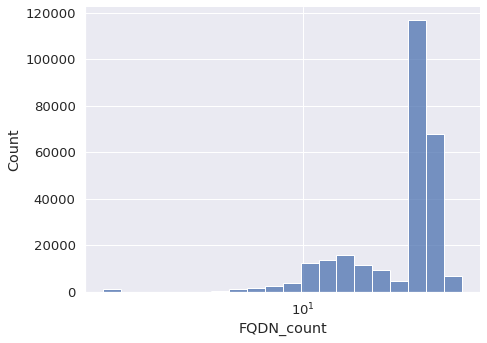

In [ ]:
draw_number_of_bins(data['FQDN_count'])

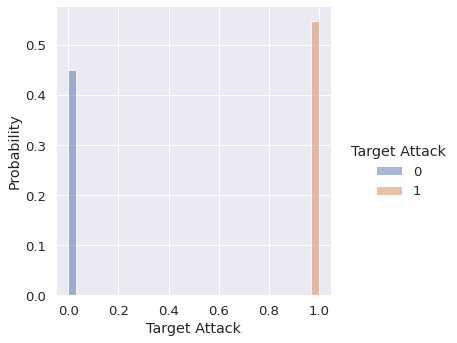

In [ ]:
sns.displot(data, x="Target Attack", hue="Target Attack", stat="probability")

# **Skewness**

https://yashowardhanshinde.medium.com/what-is-skewness-in-data-how-to-fix-skewed-data-in-python-a792e98c0fa6

In [7]:
data.skew()

C:\Users\mm\AppData\Local\Temp\ipykernel_20192\1188251951.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  data.skew()


FQDN_count         -1.101731
subdomain_length   -0.590480
upper               5.988737
lower               0.343449
numeric            -0.594384
entropy            -0.140156
special            -0.902972
labels             -0.903680
labels_max          3.979910
labels_average      5.087081
len                 2.634801
subdomain          -1.176397
Target Attack      -0.197046
dtype: float64

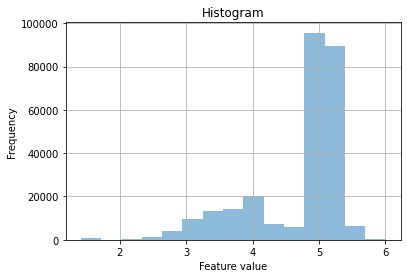

In [ ]:
df_pow = data['FQDN_count'].apply(np.sqrt)
df_pow.plot.hist(alpha=0.5, bins=15, grid=True, legend=None)
plt.xlabel("Feature value")
plt.title("Histogram")
plt.show()

C:\Users\mm\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\mm\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\mm\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level functi

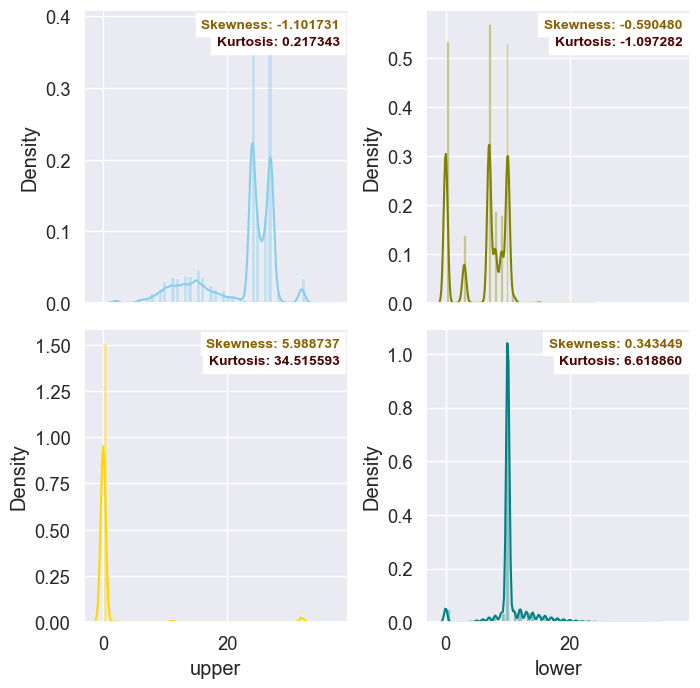

In [23]:
f, axes = plt.subplots(2, 2, figsize=(7, 7), sharex=True)
sns.distplot(data.iloc[:,0], color="skyblue", ax=axes[0,0])
sns.distplot(data.iloc[:,1], color="olive", ax=axes[0,1])
sns.distplot(data.iloc[:,2], color="gold", ax=axes[1,0])
sns.distplot(data.iloc[:,3], color="teal", ax=axes[1,1])
for i, ax in enumerate(axes.reshape(-1)):
    ax.text(x=0.97, y=0.97, transform=ax.transAxes, s="Skewness: %f" % data.iloc[:,i].skew(),\
        fontweight='demibold', fontsize=10, verticalalignment='top', horizontalalignment='right',\
        backgroundcolor='white', color='xkcd:poo brown')
    ax.text(x=0.97, y=0.91, transform=ax.transAxes, s="Kurtosis: %f" % data.iloc[:,i].kurt(),\
        fontweight='demibold', fontsize=10, verticalalignment='top', horizontalalignment='right',\
        backgroundcolor='white', color='xkcd:dried blood')
plt.tight_layout()

In [8]:
pip install scipy

Note: you may need to restart the kernel to use updated packages.


In [11]:
x = np.array(data.iloc[:,:-1])

In [12]:

import scipy
from scipy.stats import skew
print(skew(x))

[-1.10172435e+00 -5.90477152e-01  5.98870340e+00  3.43446978e-01
 -5.94381111e-01 -1.40155431e-01 -9.02966899e-01 -9.03675296e-01
  3.97988726e+00  5.08705287e+00  2.26936494e+00  1.80986398e+02
  2.63478631e+00 -1.17639004e+00]


In [13]:
print(skew(x, bias=False))

[-1.10173051e+00 -5.90480456e-01  5.98873691e+00  3.43448900e-01
 -5.94384437e-01 -1.40156215e-01 -9.02971952e-01 -9.03680352e-01
  3.97990953e+00  5.08708133e+00  2.26937764e+00  1.80987411e+02
  2.63480105e+00 -1.17639663e+00]


In [ ]:
cols1=[]
for col in data.columns:
  if col =='longest_word' or col=='sld' or col=='labels_average':
    continue
  cols1.append(col)

In [ ]:
cols1

['FQDN_count',
 'subdomain_length',
 'upper',
 'lower',
 'numeric',
 'entropy',
 'special',
 'labels',
 'labels_max',
 'len',
 'subdomain',
 'Target Attack']

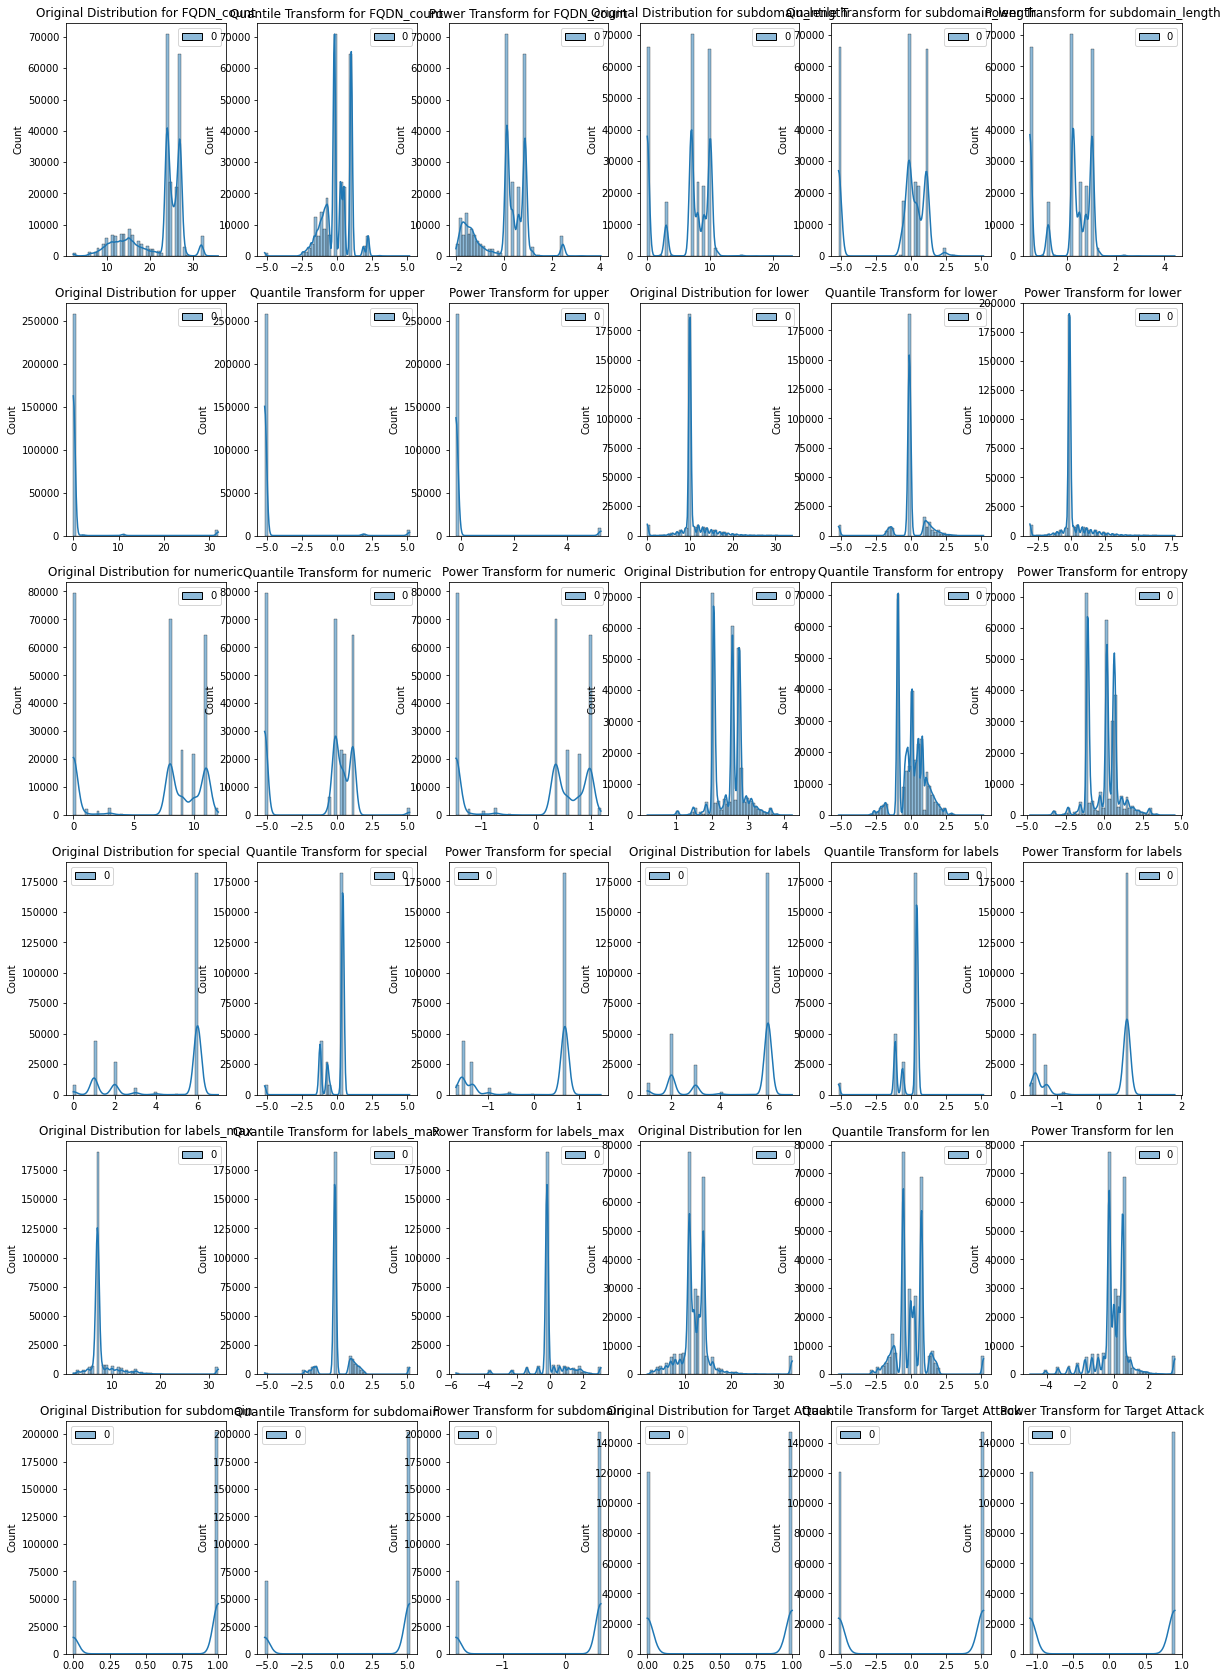

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd 
from sklearn.preprocessing import PowerTransformer, QuantileTransformer


def test_transformers(columns):
    pt = PowerTransformer()
    qt = QuantileTransformer(n_quantiles=500, output_distribution='normal')
    fig = plt.figure(figsize=(20,30))
    j = 1
    for i in columns:
       
        array = np.array(data[i]).reshape(-1, 1)
        y = pt.fit_transform(array)
        x = qt.fit_transform(array)
        plt.subplot(6,6,j)
        sns.histplot(array, bins = 50, kde = True)
        plt.title(f"Original Distribution for {i}")
        plt.subplot(6,6,j+1)
        sns.histplot(x, bins = 50, kde = True)
        plt.title(f"Quantile Transform for {i}")
        plt.subplot(6,6,j+2)
        sns.histplot(y, bins = 50, kde = True)
        plt.title(f"Power Transform for {i}")
        j += 3
test_transformers(cols1)

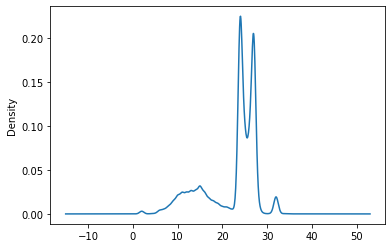

In [ ]:
 data['FQDN_count'].plot.kde()

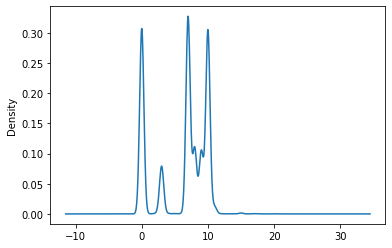

In [ ]:
 data['subdomain_length'].plot.kde()

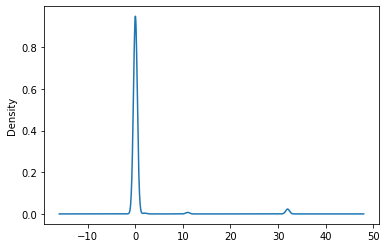

In [ ]:
 data['upper'].plot.kde()

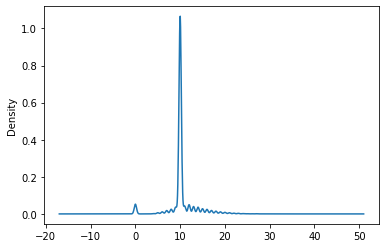

In [ ]:
 data['lower'].plot.kde()

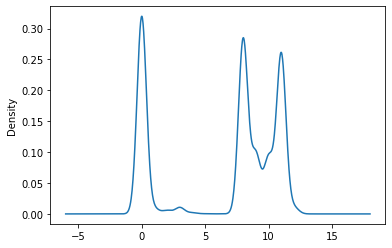

In [ ]:
 data['numeric'].plot.kde()

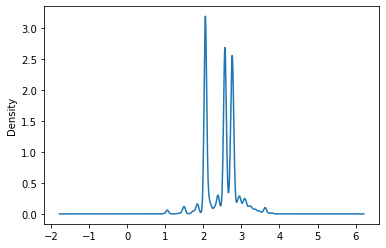

In [ ]:
 data['entropy'].plot.kde()

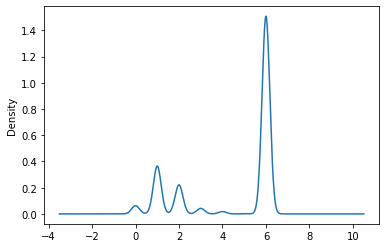

In [ ]:
 data['special'].plot.kde()

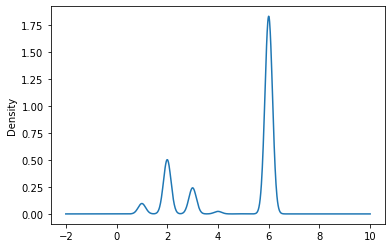

In [ ]:
 data['labels'].plot.kde()

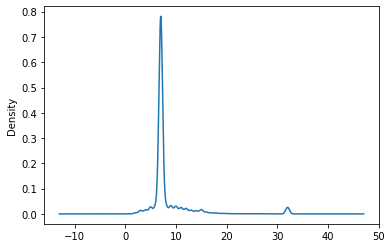

In [ ]:
 data['labels_max'].plot.kde()

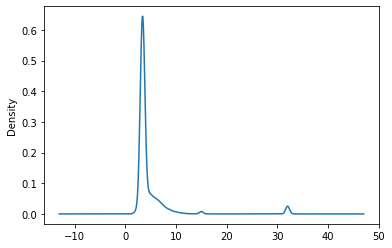

In [ ]:
 data['labels_average'].plot.kde()

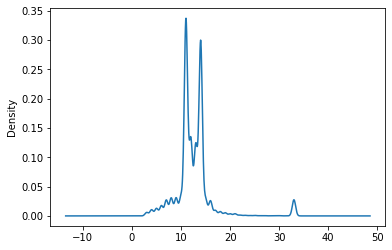

In [ ]:
 data['len'].plot.kde()

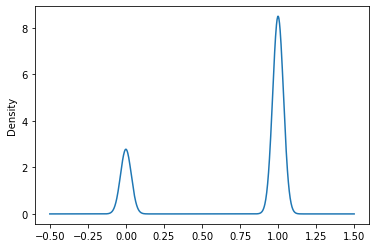

In [ ]:
 data['subdomain'].plot.kde()

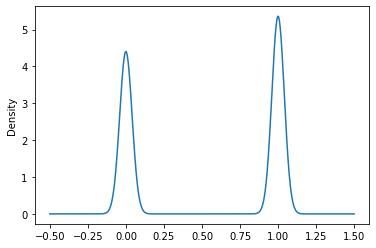

In [ ]:
 data['Target Attack'].plot.kde()

# **2. Feature engineering and data cleaning**

**transform the variables that contain string values and  Check for missing values**

In [ ]:
data['longest_word'].value_counts()

2          109981
4           70188
N            4498
C            2969
9            1906
            ...  
yaa             1
queue           1
kit             1
airdrop         1
mal             1
Name: longest_word, Length: 6224, dtype: int64

In [ ]:
data['sld'].value_counts()

192                                 109517
224                                  70188
FHEPFCELEHFCEPFFFACACACACACACABN      4498
DESKTOP-3JF04TC                       1961
239                                   1906
                                     ...  
freesgift                                1
secureserver                             1
airdropalert                             1
queue-it                                 1
lahemal                                  1
Name: sld, Length: 11112, dtype: int64

In [8]:
data.isnull().sum()

FQDN_count          0
subdomain_length    0
upper               0
lower               0
numeric             0
entropy             0
special             0
labels              0
labels_max          0
labels_average      0
longest_word        8
sld                 0
len                 0
subdomain           0
Target Attack       0
dtype: int64

In [10]:
data['longest_word'] = data['longest_word'].replace(r'(([a-z]+)|([A-Z]+))',2, regex=True)
data['longest_word'].fillna(2,inplace=True)
data['longest_word']=data['longest_word'] .astype('int') 
data['sld'] = data['sld'].replace(r'(([a-z]+)|([A-Z]+|(0-1)))',192, regex=True)
data['sld']=data['sld'] .astype('int') 

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 268074 entries, 0 to 268073
Data columns (total 15 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   FQDN_count        268074 non-null  int64  
 1   subdomain_length  268074 non-null  int64  
 2   upper             268074 non-null  int64  
 3   lower             268074 non-null  int64  
 4   numeric           268074 non-null  int64  
 5   entropy           268074 non-null  float64
 6   special           268074 non-null  int64  
 7   labels            268074 non-null  int64  
 8   labels_max        268074 non-null  int64  
 9   labels_average    268074 non-null  float64
 10  longest_word      268074 non-null  int32  
 11  sld               268074 non-null  int32  
 12  len               268074 non-null  int64  
 13  subdomain         268074 non-null  int64  
 14  Target Attack     268074 non-null  int64  
dtypes: float64(2), int32(2), int64(11)
memory usage: 28.6 MB


In [10]:
data.isnull().sum()

FQDN_count          0
subdomain_length    0
upper               0
lower               0
numeric             0
entropy             0
special             0
labels              0
labels_max          0
labels_average      0
longest_word        0
sld                 0
len                 0
subdomain           0
Target Attack       0
dtype: int64

In [ ]:
data=data.dropna()

In [7]:
import pandas as pd
import numpy as np

def clean_dataset(df):
    assert isinstance(df, pd.DataFrame), "df needs to be a pd.DataFrame"
    df.dropna(inplace=True)
    indices_to_keep = ~df.isin([np.nan, np.inf, -np.inf]).any(1)
    return df[indices_to_keep].astype(np.float64)
data=clean_dataset(data)    

# **Third part**
# Feature Filtering/Selection

In [25]:
my_list=[]
for col in data.columns:
  my_list.append(col)

In [26]:
X=np.array(data.iloc[:,:-1])
Y=np.array(data['Target Attack'])

In [ ]:
type(data)

pandas.core.frame.DataFrame

In [10]:
pip install fast_ml

In [27]:
from fast_ml.model_development import train_valid_test_split

X_train, y_train, X_valid, y_valid, X_test, y_test = train_valid_test_split(data, target = 'Target Attack', 
                                                                            train_size=0.6, valid_size=0.2, test_size=0.2)

print(X_train.shape), print(y_train.shape)
print(X_valid.shape), print(y_valid.shape)
print(X_test.shape), print(y_test.shape)

(160844, 14)
(160844,)
(53615, 14)
(53615,)
(53615, 14)
(53615,)


(None, None)

## Train the LR before feature selection 

In [ ]:
from sklearn import linear_model
clf = linear_model.LogisticRegression(max_iter=1000)

clf.fit(X_train,y_train)
from sklearn.metrics import classification_report,accuracy_score
y_pred=clf.predict(X_test)
acc=accuracy_score(y_pred,y_test)
print(acc)

print(classification_report(y_pred,y_test))

0.8236127949267928
              precision    recall  f1-score   support

           0       0.62      0.99      0.76     15085
           1       1.00      0.76      0.86     38530

    accuracy                           0.82     53615
   macro avg       0.81      0.87      0.81     53615
weighted avg       0.89      0.82      0.83     53615



n_components = 1
n_components = 2
n_components = 3
n_components = 4
n_components = 5
n_components = 6
n_components = 7
n_components = 8
n_components = 9
n_components = 10
n_components = 11
n_components = 12
n_components = 13


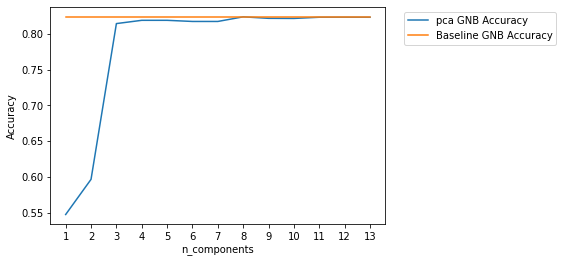

In [ ]:
from sklearn.decomposition import PCA
def tune_pca(clf, X_trian, y_train, X_test, y_test, n_min, n_max):
    accs = []
    for i in range(n_min, n_max):
        print(f'n_components = {i}')
        pca = PCA(n_components=i)
        X_train_pca = pca.fit_transform(X_train)
        X_test_pca = pca.transform(X_test)
        clf.fit(X_train_pca, y_train)
        preds = clf.predict(X_test_pca)
        accuracy = accuracy_score(y_test, preds)
        accs.append(accuracy)
    return accs

def visualize_accs(baseline_acc, tuned_accs, clf_name, min_feats=0, operation='PCA', xlabel='n_components'):
    plt.plot(range(min_feats, min_feats+len(tuned_accs)), tuned_accs, label=f'{operation} {clf_name} Accuracy')
    plt.plot(range(min_feats, min_feats+len(tuned_accs)), [baseline_acc]*len(tuned_accs), label=f'Baseline {clf_name} Accuracy')
    plt.xlabel(xlabel)
    plt.xticks(range(min_feats, min_feats+len(tuned_accs)))
    plt.ylabel("Accuracy")
    plt.legend(bbox_to_anchor=(1.04,1), loc="upper left")
clf = linear_model.LogisticRegression(max_iter=1000)
clf_pca_accs = tune_pca(clf, X_train, y_train, X_test, y_test, 1, 14)
visualize_accs(acc, clf_pca_accs, "GNB", min_feats=1, operation='pca')

In [ ]:
# construct a dataframe using pandas
df_PCA=pd.DataFrame(X_valid)
 
# Scale data before applying PCA
scaling=StandardScaler()
 
# Use fit and transform method
scaling.fit(df_PCA)
Scaled_data=scaling.transform(df_PCA)
 
# Set the n_components=3
principal=PCA(n_components=5)
principal.fit(Scaled_data)
x_pca=principal.transform(Scaled_data)
 
# Check the dimensions of data after PCA
print(x_pca.shape)

(53615, 5)


In [ ]:
x_pca

array([[-1.3216668 ,  0.32558855, -0.41078807, -0.12626522,  0.61879439],
       [-1.3216668 ,  0.32558855, -0.41078807, -0.12626522,  0.61879439],
       [ 3.49900488, -1.78230081, -0.60689601, -0.08173926,  0.52987592],
       ...,
       [-1.57595069, -0.25286538,  1.22236978,  0.1436999 , -0.89061386],
       [-1.3216668 ,  0.32558855, -0.41078807, -0.12626522,  0.61879439],
       [-1.3216668 ,  0.32558855, -0.41078807, -0.12626522,  0.61879439]])

**mutual information**is a filter method that determines the decrease in entropy resulting from a dataset's change. By assessing each variable's information gain in relation to the target variable, it can be used for feature selection.

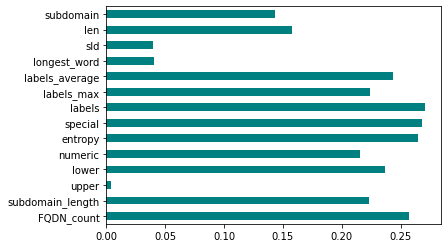

In [ ]:
from scipy._lib.doccer import indentcount_lines
from sklearn.feature_selection import mutual_info_classif
import matplotlib.pyplot as plt
%matplotlib inline
importanes=mutual_info_classif(X_valid,y_valid)
features_importanes=pd.Series(importanes,data.columns[0:len(data.columns)-1])
features_importanes.plot(kind='barh',color='teal')

plt.show()

In [ ]:
features_importanes

FQDN_count          0.257250
subdomain_length    0.222935
upper               0.003624
lower               0.236734
numeric             0.215614
entropy             0.265131
special             0.267786
labels              0.270938
labels_max          0.224120
labels_average      0.243084
longest_word        0.040407
sld                 0.039551
len                 0.157859
subdomain           0.143133
dtype: float64

In [ ]:
list_data_mutual_info=['labels','special','entropy']

In [ ]:
importanes

array([0.25725032, 0.2229354 , 0.00362422, 0.23673382, 0.21561419,
       0.26513149, 0.26778649, 0.27093807, 0.22411994, 0.24308369,
       0.0404067 , 0.03955116, 0.15785921, 0.14313254])

A filter method for categorical features in a dataset is **the Chi-square test**. Each feature's relationship to the target is analyzed using Chi-square, and the desired number of features with the highest Chi-square scores are chosen. The following prerequisites must be satisfied in order to correctly use the chi-squared to assess the relationship between different dataset attributes and the target variable: categorical variables are required,

In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
X_Cat=X_valid.astype(int)
chi2_features=SelectKBest(chi2,k=5)
X_Kbest_feat=chi2_features.fit_transform(X_Cat,y_valid)
print("Feature Number before applying Chi-square Test :", X_Cat.shape[1])
print("Feature Number after applying Chi-square Test :",X_Kbest_feat.shape[1])

Feature Number before applying Chi-square Test : 14
Feature Number after applying Chi-square Test : 5


In [ ]:
X_Kbest_feat

array([[25,  8,  9,  6,  6],
       [25,  8,  9,  6,  6],
       [12,  0,  1,  1,  2],
       ...,
       [24,  7,  8,  6,  6],
       [25,  8,  9,  6,  6],
       [25,  8,  9,  6,  6]])

In [ ]:
X_valid

,FQDN_count,subdomain_length,upper,lower,numeric,entropy,special,labels,labels_max,labels_average,longest_word,sld,len,subdomain
186028,25.0,8.0,0.0,10.0,9.0,2.556642,6.0,6.0,7.0,3.333333,2.0,192.0,12.0,1.0
108809,25.0,8.0,0.0,10.0,9.0,2.556642,6.0,6.0,7.0,3.333333,2.0,192.0,12.0,1.0
106825,12.0,0.0,0.0,10.0,1.0,2.989735,1.0,2.0,9.0,5.500000,2.0,192.0,10.0,0.0
215241,27.0,10.0,0.0,10.0,11.0,2.767195,6.0,6.0,7.0,3.666667,2.0,192.0,14.0,1.0
24388,27.0,10.0,0.0,10.0,11.0,2.570417,6.0,6.0,7.0,3.666667,2.0,192.0,14.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
214294,24.0,7.0,0.0,10.0,8.0,2.054029,6.0,6.0,7.0,3.166667,4.0,224.0,11.0,1.0
142223,27.0,10.0,0.0,10.0,11.0,2.767195,6.0,6.0,7.0,3.666667,2.0,192.0,14.0,1.0
244718,24.0,7.0,0.0,10.0,8.0,2.054029,6.0,6.0,7.0,3.166667,4.0,224.0,11.0,1.0
162226,25.0,8.0,0.0,10.0,9.0,2.556642,6.0,6.0,7.0,3.333333,2.0,192.0,12.0,1.0


In [ ]:
list_data_Chi_Squre=['FQDN_count','subdomain_length','numeric','special','labels']

In [8]:
lis=[]
for col in data.columns:
  if col=='Target Attack':
    continue
  lis.append(col)


In [9]:
df = pd.DataFrame(X, columns =lis)

Using f_classif : ANOVA F-value between label/feature for classification tasks.

['FQDN_count' 'subdomain_length' 'numeric' 'special' 'labels']
accuracies :[2.47340478e+04 2.59601484e+04 2.79558642e+02 4.90658105e+03
 2.96877451e+04 6.49111081e+02 2.71712387e+04 2.53831015e+04
 4.55925848e+02 2.94981850e+02 3.04155089e+03 4.68703928e-01
 1.44625153e+03 1.79480445e+04]


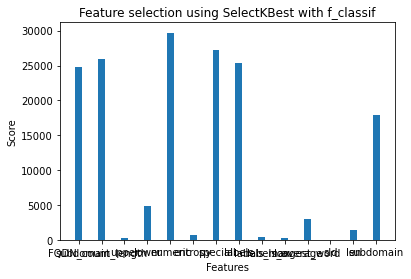

In [10]:
from sklearn.feature_selection import SelectKBest,f_classif
featureSelection= SelectKBest(f_classif, k=5).fit(X_valid, y_valid)
X_train_ANOVA = featureSelection.transform(X_valid)
print(featureSelection.get_feature_names_out())
featureSelection.scores_
col_names =df.columns
print(f"accuracies :{featureSelection.scores_}")
plt.bar(col_names , featureSelection.scores_, width=0.3)
plt.title("Feature selection using SelectKBest with f_classif")
plt.xlabel("Features")
plt.ylabel("Score")
plt.show()

In [11]:
X_train_ANOVA

array([[24.,  7.,  8.,  6.,  6.],
       [27., 10., 11.,  6.,  6.],
       [26.,  9., 10.,  6.,  6.],
       ...,
       [27., 10., 11.,  6.,  6.],
       [24.,  7.,  8.,  6.,  6.],
       [25.,  8.,  9.,  6.,  6.]])

In [12]:
list_data_after_ANOVA=['FQDN_count','subdomain_length','numeric','special','labels']

**Coefficient  Correlation**
The linear relationship between two or more variables is measured via correlation. We can forecast one variable based on another through correlation. Because the desirable variables have a strong correlation with the target, correlation can be used to select features. Variables should also be uncorrelated among themselves while being correlated with the objective.

We can anticipate one variable from another if the two are correlated. As a result, if two features are correlated, the model only actually requires one of them as the other does not provide any new information. Here, we'll make advantage of the Pearson Correlation.

Text(0.5, 1.0, 'Correlation Matrix of Static data')

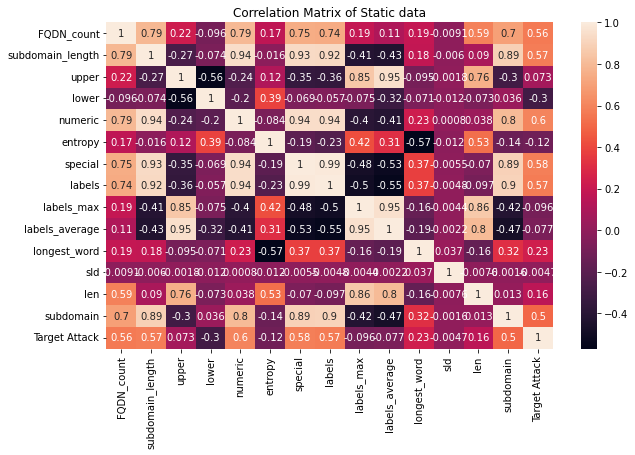

In [ ]:
cor = data.corr()

plt.figure(figsize= (10,6))
sns.heatmap(cor, annot = True)
plt.title("Correlation Matrix of Static data")

In [ ]:
cor

,FQDN_count,subdomain_length,upper,lower,numeric,entropy,special,labels,labels_max,labels_average,longest_word,sld,len,subdomain,Target Attack
FQDN_count,1.000000,0.788615,0.223162,-0.095881,0.793079,0.167806,0.748354,0.739786,0.186992,0.109444,0.189408,-0.009063,0.588849,0.698685,0.563563
subdomain_length,0.788615,1.000000,-0.265780,-0.073809,0.944548,-0.015773,0.929076,0.923210,-0.410820,-0.431748,0.182549,-0.005955,0.090472,0.888718,0.572053
upper,0.223162,-0.265780,1.000000,-0.555147,-0.236155,0.115458,-0.347061,-0.359428,0.847046,0.946883,-0.094840,-0.001761,0.759096,-0.299079,0.072895
lower,-0.095881,-0.073809,-0.555147,1.000000,-0.197667,0.385455,-0.068635,-0.057215,-0.074632,-0.318585,-0.071480,-0.011632,-0.072903,0.036077,-0.295599
numeric,0.793079,0.944548,-0.236155,-0.197667,1.000000,-0.084281,0.941951,0.940191,-0.395441,-0.411193,0.227495,0.000804,0.037743,0.801602,0.599252
entropy,0.167806,-0.015773,0.115458,0.385455,-0.084281,1.000000,-0.192317,-0.226686,0.418591,0.307460,-0.569350,-0.012239,0.526296,-0.138240,-0.119050
special,0.748354,0.929076,-0.347061,-0.068635,0.941951,-0.192317,1.000000,0.991309,-0.477689,-0.525847,0.370692,-0.005483,-0.070203,0.890508,0.582107
labels,0.739786,0.923210,-0.359428,-0.057215,0.940191,-0.226686,0.991309,1.000000,-0.497794,-0.545609,0.371556,-0.004802,-0.096721,0.898859,0.569414
labels_max,0.186992,-0.410820,0.847046,-0.074632,-0.395441,0.418591,-0.477689,-0.497794,1.000000,0.954819,-0.157440,-0.004399,0.856082,-0.420510,-0.096350
labels_average,0.109444,-0.431748,0.946883,-0.318585,-0.411193,0.307460,-0.525847,-0.545609,0.954819,1.000000,-0.191223,-0.002228,0.802346,-0.473714,-0.077167


The absolute difference from the mean value is calculated using **the mean absolute difference (MAD)**. The absence of the square in MAD measures is the primary distinction between them and variance measures. The MAD is a scale variant, just as the variance.  This implies that the discriminatory power increases as MAD increases.

In [ ]:
lis

['FQDN_count',
 'subdomain_length',
 'upper',
 'lower',
 'numeric',
 'entropy',
 'special',
 'labels',
 'labels_max',
 'labels_average',
 'longest_word',
 'sld',
 'len',
 'subdomain']

# **Four Part**
# Model Training:

In [ ]:
df

,FQDN_count,subdomain_length,upper,lower,numeric,entropy,special,labels,labels_max,labels_average,longest_word,sld,len,subdomain
0,27.0,10.0,0.0,10.0,11.0,2.570417,6.0,6.0,7.0,3.666667,2.0,192.0,14.0,1.0
1,27.0,10.0,0.0,10.0,11.0,2.767195,6.0,6.0,7.0,3.666667,2.0,192.0,14.0,1.0
2,26.0,9.0,0.0,10.0,10.0,2.742338,6.0,6.0,7.0,3.500000,2.0,192.0,13.0,1.0
3,27.0,10.0,0.0,10.0,11.0,2.570417,6.0,6.0,7.0,3.666667,2.0,192.0,14.0,1.0
4,15.0,9.0,0.0,11.0,0.0,2.929439,4.0,3.0,5.0,4.333333,2.0,192.0,15.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
268069,18.0,3.0,0.0,16.0,0.0,2.338623,2.0,3.0,10.0,5.333333,2.0,192.0,14.0,1.0
268070,27.0,10.0,0.0,10.0,11.0,2.767195,6.0,6.0,7.0,3.666667,2.0,192.0,14.0,1.0
268071,27.0,10.0,0.0,10.0,11.0,2.767195,6.0,6.0,7.0,3.666667,2.0,192.0,14.0,1.0
268072,16.0,0.0,0.0,14.0,0.0,3.249687,2.0,2.0,13.0,7.500000,2.0,192.0,14.0,0.0


# Taking the  five features that given from Chi Squre

In [ ]:
X_chi_squre = data[['FQDN_count', 'subdomain_length', 'numeric','special','labels']].copy()



**Applying data Normalization**

In [ ]:
# copy the data
new_data_chi_squre = X_chi_squre.copy()
  
# apply normalization techniques
for column in new_data_chi_squre.columns:
    new_data_chi_squre[column] = new_data_chi_squre[column]  / new_data_chi_squre[column].abs().max()
      
# view normalized data
display(new_data_chi_squre)

,FQDN_count,subdomain_length,numeric,special,labels
0,0.750000,0.434783,0.916667,0.857143,0.857143
1,0.750000,0.434783,0.916667,0.857143,0.857143
2,0.722222,0.391304,0.833333,0.857143,0.857143
3,0.750000,0.434783,0.916667,0.857143,0.857143
4,0.416667,0.391304,0.000000,0.571429,0.428571
...,...,...,...,...,...
268069,0.500000,0.130435,0.000000,0.285714,0.428571
268070,0.750000,0.434783,0.916667,0.857143,0.857143
268071,0.750000,0.434783,0.916667,0.857143,0.857143
268072,0.444444,0.000000,0.000000,0.285714,0.285714


In [ ]:
alldata_chi_squre = new_data_chi_squre[['FQDN_count', 'subdomain_length', 'numeric','special','labels']].copy()
alldata_chi_squre['Target Attack']=Y

In [ ]:
alldata_chi_squre

,FQDN_count,subdomain_length,numeric,special,labels,Target Attack
0,0.750000,0.434783,0.916667,0.857143,0.857143,1.0
1,0.750000,0.434783,0.916667,0.857143,0.857143,1.0
2,0.722222,0.391304,0.833333,0.857143,0.857143,0.0
3,0.750000,0.434783,0.916667,0.857143,0.857143,1.0
4,0.416667,0.391304,0.000000,0.571429,0.428571,1.0
...,...,...,...,...,...,...
268069,0.500000,0.130435,0.000000,0.285714,0.428571,0.0
268070,0.750000,0.434783,0.916667,0.857143,0.857143,0.0
268071,0.750000,0.434783,0.916667,0.857143,0.857143,1.0
268072,0.444444,0.000000,0.000000,0.285714,0.285714,0.0


In [ ]:
X_train_chi_squre, y_train_chi_squre, X_valid_chi_squre, y_valid_chi_squre, X_test_chi_squre, y_test_chi_squre = train_valid_test_split(alldata_chi_squre, target='Target Attack', 
                                                                            train_size=0.6, valid_size=0.2, test_size=0.2)

In [ ]:
X_train_chi_squre.shape

(160844, 5)

In [ ]:
type(X_train_chi_squre)

pandas.core.frame.DataFrame

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from mlxtend.plotting import plot_decision_regions
from seaborn import load_dataset, pairplot
from sklearn.linear_model import Perceptron
from sklearn.metrics import classification_report, ConfusionMatrixDisplay, accuracy_score, confusion_matrix
from mlxtend.plotting import category_scatter
from sklearn import svm
from sklearn.datasets import make_classification, make_circles
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler    
from matplotlib.colors import ListedColormap  
from mlxtend.plotting import plot_confusion_matrix
from sklearn.preprocessing import MultiLabelBinarizer

%matplotlib inline

In [13]:
def draw_CM_AND_Make_Classification_report(y_test,y_predict,text):
    print('\nConfusion Matrix:\n')
    print(confusion_matrix(y_test, y_predict))
    ax = sns.heatmap(confusion_matrix(y_test,y_predict ), annot=True, cmap='PuBuGn')
    plt.xlabel('Predictions', fontsize=18)
    plt.ylabel('Actuals', fontsize=18)
    plt.title(text, fontsize=18)
    plt.show()
    print(classification_report(y_test,y_predict))
    

**Hyper parameter tunning  on Logistic Regression using gride search on validaion set**





In [ ]:
from sklearn.model_selection import GridSearchCV
model = linear_model.LogisticRegression()
grid_vals = {'penalty': ['l1','l2'], 'C': [0.001,0.01,0.1,1]}
grid_lr = GridSearchCV(estimator=model, param_grid=grid_vals, scoring='accuracy', 
                       cv=6, refit=True, return_train_score=True) 

#Training and Prediction

grid_lr.fit(X_valid_chi_squre, y_valid_chi_squre)
preds = grid_lr.best_estimator_.predict(X_test_chi_squre)
evaluation_LR = accuracy_score(y_test_chi_squre, preds)
evaluation_LR

0.813242562715658

In [ ]:
print(" Results from Grid Search " )
print("\n The best estimator across ALL searched params:\n",grid_lr.best_estimator_)
print("\n The best score across ALL searched params:\n",grid_lr.best_score_)
print("\n The best parameters across ALL searched params:\n",grid_lr.best_params_)

 Results from Grid Search 

 The best estimator across ALL searched params:
 LogisticRegression(C=1)

 The best score across ALL searched params:
 0.8058564419711511

 The best parameters across ALL searched params:
 {'C': 1, 'penalty': 'l2'}


**Logistic Regresion with best parameters training on training data after applying chi_squre feature selction**

In [ ]:
from sklearn import linear_model
logr_chi_squre = linear_model.LogisticRegression(penalty='l2',C=1)
logr_chi_squre.fit(X_train_chi_squre, y_train_chi_squre)
y_predict_LR_chi_squre = logr_chi_squre.predict(X_test_chi_squre)
evaluation_LR_chi_squre = accuracy_score(y_test_chi_squre, y_predict_LR_chi_squre)
evaluation_LR_chi_squre

0.8013802107619137


Confusion Matrix:

[[15221  8920]
 [ 1729 27745]]


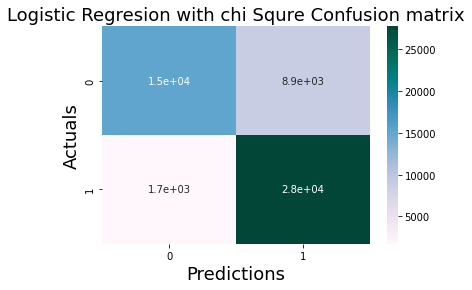

              precision    recall  f1-score   support

         0.0       0.90      0.63      0.74     24141
         1.0       0.76      0.94      0.84     29474

    accuracy                           0.80     53615
   macro avg       0.83      0.79      0.79     53615
weighted avg       0.82      0.80      0.79     53615



In [ ]:
draw_CM_AND_Make_Classification_report(y_test_chi_squre,y_predict_LR_chi_squre,"Logistic Regresion with chi Squre Confusion matrix")

**Hyper parameter tunning on Decesion tree using validation set**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

def Decesion_tree_grid_search(X,y,nfolds):
    #create a dictionary of all values we want to test
    params = { 'criterion':['gini','entropy'],'max_depth': np.arange(3, 15)}
    # decision tree model
    dtree_model=DecisionTreeClassifier()
    #use gridsearch to test all values
    dtree_gscv = GridSearchCV(dtree_model, params, cv=nfolds)
    #fit model to data
    dtree_gscv.fit(X, y)
    return dtree_gscv.best_params_

Decesion_tree_grid_search(X_valid_chi_squre,y_valid_chi_squre,5)

{'criterion': 'gini', 'max_depth': 5}

**Training  Decesion tree using training data using the hyper paramters that gaven from the previous step**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
clf_Desision_Tree_chi_squre = DecisionTreeClassifier(criterion='gini',max_depth=5)
clf_Desision_Tree_chi_squre = clf_Desision_Tree_chi_squre.fit(X_train_chi_squre, y_train_chi_squre)
y_predict_DT_chi_squre = clf_Desision_Tree_chi_squre.predict(X_test_chi_squre)
evaluation_DT_chi_squre = accuracy_score(y_test_chi_squre, y_predict_DT_chi_squre)
evaluation_DT_chi_squre

0.8263359134570549


Confusion Matrix:

[[14869  9272]
 [   39 29435]]


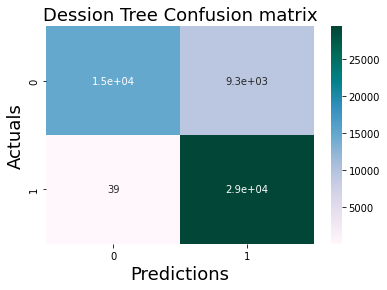

              precision    recall  f1-score   support

         0.0       1.00      0.62      0.76     24141
         1.0       0.76      1.00      0.86     29474

    accuracy                           0.83     53615
   macro avg       0.88      0.81      0.81     53615
weighted avg       0.87      0.83      0.82     53615



In [ ]:
draw_CM_AND_Make_Classification_report(y_test_chi_squre,y_predict_DT_chi_squre,"Dession Tree Confusion matrix")

## adaboost Classiffier with chi_squre

**Hyper parameter tunning on Adaboost classifier using validation set**

In [ ]:
# define the model with default hyperparameters
model = AdaBoostClassifier()

# define the grid of values to search
grid = dict()
grid['n_estimators'] = [10, 50, 100, 500]
grid['learning_rate'] = [0.0001, 0.001, 0.01, 0.1, 1.0]

# define the evaluation procedure


# define the grid search procedure
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=5, scoring='accuracy')

# execute the grid search
grid_result = grid_search.fit(X_valid_chi_squre, y_valid_chi_squre)

# summarize the best score and configuration
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Best: 0.825086 using {'learning_rate': 1.0, 'n_estimators': 500}


**Training Adaboost classifer using training data using the hyper paramters that gaven from the previous step**

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
adabost_chi_squre = AdaBoostClassifier(n_estimators=500, random_state=0,learning_rate=1.0)

adabost_chi_squre.fit(X_train_chi_squre, y_train_chi_squre)
y_predict_adabost_chi_squre = adabost_chi_squre.predict(X_test_chi_squre)
evaluation_adabost_chi_squre = accuracy_score(y_test_chi_squre, y_predict_adabost_chi_squre)
evaluation_adabost_chi_squre

0.8261680499860113


Confusion Matrix:

[[14875  9266]
 [   54 29420]]


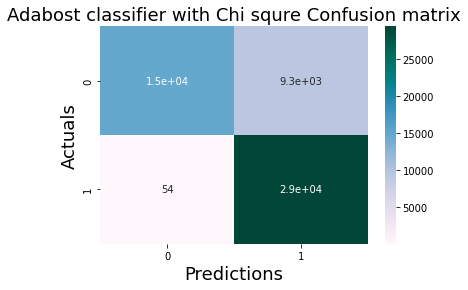

              precision    recall  f1-score   support

         0.0       1.00      0.62      0.76     24141
         1.0       0.76      1.00      0.86     29474

    accuracy                           0.83     53615
   macro avg       0.88      0.81      0.81     53615
weighted avg       0.87      0.83      0.82     53615



In [ ]:
draw_CM_AND_Make_Classification_report(y_test_chi_squre,y_predict_adabost_chi_squre,"Adabost classifier with Chi squre Confusion matrix")

# **Mutual Info**

In [35]:
X_mutual_info = data[['labels','special','entropy']].copy()

In [36]:
# copy the data
new_data_mutual_info = X_mutual_info.copy()
  
# apply normalization techniques
for column in new_data_mutual_info.columns:
    new_data_mutual_info[column] = new_data_mutual_info[column]  / new_data_mutual_info[column].abs().max()
      
# view normalized data
display(new_data_mutual_info)

,labels,special,entropy
0,0.857143,0.857143,0.609559
1,0.857143,0.857143,0.656224
2,0.857143,0.857143,0.650329
3,0.857143,0.857143,0.609559
4,0.428571,0.571429,0.694699
...,...,...,...
268069,0.428571,0.285714,0.554591
268070,0.857143,0.857143,0.656224
268071,0.857143,0.857143,0.656224
268072,0.285714,0.285714,0.770644


In [37]:
alldata_mutual_info = new_data_mutual_info[['labels','special','entropy']].copy()
alldata_mutual_info['Target Attack']=Y

In [38]:
alldata_mutual_info

,labels,special,entropy,Target Attack
0,0.857143,0.857143,0.609559,1
1,0.857143,0.857143,0.656224,1
2,0.857143,0.857143,0.650329,0
3,0.857143,0.857143,0.609559,1
4,0.428571,0.571429,0.694699,1
...,...,...,...,...
268069,0.428571,0.285714,0.554591,0
268070,0.857143,0.857143,0.656224,0
268071,0.857143,0.857143,0.656224,1
268072,0.285714,0.285714,0.770644,0


In [39]:
X_train_mutual_info, y_train_mutual_info, X_valid_mutual_info, y_valid_mutual_info, X_test_mutual_info, y_test_mutual_info = train_valid_test_split(alldata_mutual_info, target='Target Attack', 
                                                                            train_size=0.6, valid_size=0.2, test_size=0.2)

**Logistic Regression with the best paramters training on data after applying Mutual Info Feature selection** 

In [40]:
from sklearn import linear_model
logr_mutual_info = linear_model.LogisticRegression(penalty='l2',C=1)
logr_mutual_info.fit(X_train_mutual_info, y_train_mutual_info)
y_predict_LR_mutual_info= logr_mutual_info.predict(X_test_mutual_info)
evaluation_LR_mutual_info = accuracy_score(y_test_mutual_info, y_predict_LR_mutual_info)
evaluation_LR_mutual_info

0.8011563928005222


Confusion Matrix:

[[15264  9108]
 [ 1553 27690]]


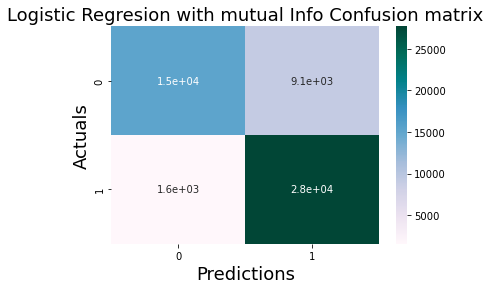

              precision    recall  f1-score   support

           0       0.91      0.63      0.74     24372
           1       0.75      0.95      0.84     29243

    accuracy                           0.80     53615
   macro avg       0.83      0.79      0.79     53615
weighted avg       0.82      0.80      0.79     53615



In [41]:
draw_CM_AND_Make_Classification_report(y_test_mutual_info,y_predict_LR_mutual_info,"Logistic Regresion with mutual Info Confusion matrix")

**Decesion tree with the best paramters training on data after applying Mutual Info Feature selection**

In [42]:
from sklearn.tree import DecisionTreeClassifier
clf_Desision_Tree_mutual_info= DecisionTreeClassifier(criterion='gini',max_depth=5)
clf_Desision_Tree_mutual_info = clf_Desision_Tree_mutual_info.fit(X_train_mutual_info, y_train_mutual_info)
y_predict_DT_mutual_info = clf_Desision_Tree_mutual_info.predict(X_test_mutual_info)
evaluation_DT_mutual_info = accuracy_score(y_test_mutual_info, y_predict_DT_mutual_info)
evaluation_DT_mutual_info

0.8232584164879232


Confusion Matrix:

[[14942  9430]
 [   46 29197]]


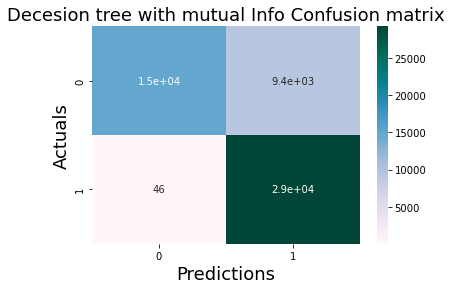

              precision    recall  f1-score   support

           0       1.00      0.61      0.76     24372
           1       0.76      1.00      0.86     29243

    accuracy                           0.82     53615
   macro avg       0.88      0.81      0.81     53615
weighted avg       0.87      0.82      0.81     53615



In [43]:
draw_CM_AND_Make_Classification_report(y_test_mutual_info,y_predict_DT_mutual_info,"Decesion tree with mutual Info Confusion matrix")

**Adaboost classifer with the best paramters training on data after applying Mutual Info Feature selection**

In [44]:
from sklearn.ensemble import AdaBoostClassifier
adabost_mutual_info = AdaBoostClassifier(n_estimators=500, random_state=0,learning_rate=1.0)

adabost_mutual_info.fit(X_train_mutual_info, y_train_mutual_info)
y_predict_adabost_mutual_info = adabost_mutual_info.predict(X_test_mutual_info)
evaluation_adabost_mutual_info = accuracy_score(y_test_mutual_info, y_predict_adabost_mutual_info)
evaluation_adabost_mutual_info

0.8236127949267928


Confusion Matrix:

[[14671  9307]
 [   26 29611]]


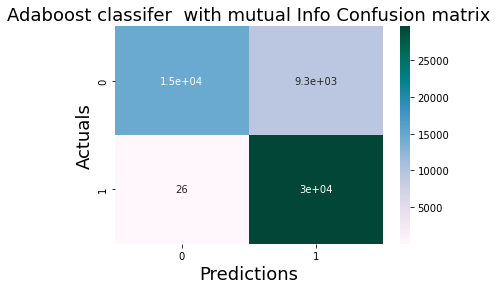

              precision    recall  f1-score   support

           0       1.00      0.61      0.76     23978
           1       0.76      1.00      0.86     29637

    accuracy                           0.83     53615
   macro avg       0.88      0.81      0.81     53615
weighted avg       0.87      0.83      0.82     53615



In [45]:
draw_CM_AND_Make_Classification_report(y_test_ANOVA,y_predict_adabost_ANOVA,"Adaboost classifer  with mutual Info Confusion matrix")

## Models_With_ANOVA feature Selection

In [14]:
X_ANOVA = data[['FQDN_count','subdomain_length','numeric','special','labels']].copy()

In [15]:
# copy the data
new_data_ANOVA= X_ANOVA.copy()
  
# apply normalization techniques
for column in new_data_ANOVA.columns:
    new_data_ANOVA[column] = new_data_ANOVA[column]  / new_data_ANOVA[column].abs().max()
      
# view normalized data
display(new_data_ANOVA)

,FQDN_count,subdomain_length,numeric,special,labels
0,0.750000,0.434783,0.916667,0.857143,0.857143
1,0.750000,0.434783,0.916667,0.857143,0.857143
2,0.722222,0.391304,0.833333,0.857143,0.857143
3,0.750000,0.434783,0.916667,0.857143,0.857143
4,0.416667,0.391304,0.000000,0.571429,0.428571
...,...,...,...,...,...
268069,0.500000,0.130435,0.000000,0.285714,0.428571
268070,0.750000,0.434783,0.916667,0.857143,0.857143
268071,0.750000,0.434783,0.916667,0.857143,0.857143
268072,0.444444,0.000000,0.000000,0.285714,0.285714


In [16]:
alldata_ANOVA = new_data_ANOVA[['FQDN_count','subdomain_length','numeric','special','labels']].copy()
alldata_ANOVA['Target Attack']=Y

In [11]:
alldata_ANOVA

,FQDN_count,subdomain_length,numeric,special,labels,Target Attack
0,0.750000,0.434783,0.916667,0.857143,0.857143,1
1,0.750000,0.434783,0.916667,0.857143,0.857143,1
2,0.722222,0.391304,0.833333,0.857143,0.857143,0
3,0.750000,0.434783,0.916667,0.857143,0.857143,1
4,0.416667,0.391304,0.000000,0.571429,0.428571,1
...,...,...,...,...,...,...
268069,0.500000,0.130435,0.000000,0.285714,0.428571,0
268070,0.750000,0.434783,0.916667,0.857143,0.857143,0
268071,0.750000,0.434783,0.916667,0.857143,0.857143,1
268072,0.444444,0.000000,0.000000,0.285714,0.285714,0


In [18]:
from fast_ml.model_development import train_valid_test_split

In [19]:
X_train_ANOVA, y_train_ANOVA, X_valid_ANOVA, y_valid_ANOVA, X_test_ANOVA, y_test_ANOVA = train_valid_test_split(alldata_ANOVA, target='Target Attack', 
                                                                            train_size=0.6, valid_size=0.2, test_size=0.2)

### Logistic Regression with the best paramters training on data after applying ANOVA Feature selection


In [18]:
from sklearn import linear_model
logr_ANOVA = linear_model.LogisticRegression(penalty='l2',C=1)
logr_ANOVA.fit(X_train_ANOVA, y_train_ANOVA)
y_predict_LR_ANOVA= logr_ANOVA.predict(X_test_ANOVA)
evaluation_LR_ANOVA = accuracy_score(y_test_ANOVA, y_predict_LR_ANOVA)
evaluation_LR_ANOVA

0.8011563928005222


Confusion Matrix:

[[15020  8958]
 [ 1703 27934]]


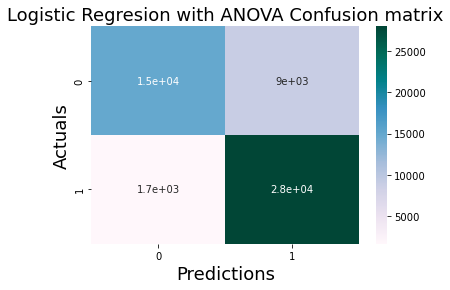

              precision    recall  f1-score   support

           0       0.90      0.63      0.74     23978
           1       0.76      0.94      0.84     29637

    accuracy                           0.80     53615
   macro avg       0.83      0.78      0.79     53615
weighted avg       0.82      0.80      0.79     53615



In [46]:
draw_CM_AND_Make_Classification_report(y_test_ANOVA,y_predict_LR_ANOVA,"Logistic Regresion with ANOVA Confusion matrix")

### Decesion tree with the best paramters training on data after applying ANOVA Feature selection

In [47]:
from sklearn.tree import DecisionTreeClassifier
clf_Desision_Tree_ANOVA= DecisionTreeClassifier(criterion='gini',max_depth=5)
clf_Desision_Tree_ANOVA = clf_Desision_Tree_ANOVA.fit(X_train_ANOVA, y_train_ANOVA)
y_predict_DT_ANOVA = clf_Desision_Tree_ANOVA.predict(X_test_ANOVA)
evaluation_DT_ANOVA = accuracy_score(y_test_ANOVA, y_predict_DT_ANOVA)
evaluation_DT_ANOVA

0.8259069290310548


Confusion Matrix:

[[14672  9306]
 [   28 29609]]


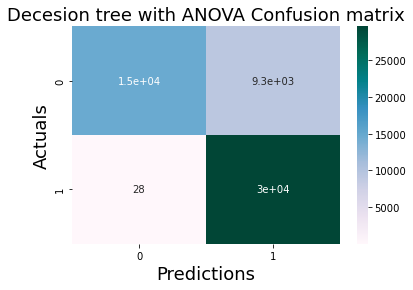

              precision    recall  f1-score   support

           0       1.00      0.61      0.76     23978
           1       0.76      1.00      0.86     29637

    accuracy                           0.83     53615
   macro avg       0.88      0.81      0.81     53615
weighted avg       0.87      0.83      0.82     53615



In [48]:
draw_CM_AND_Make_Classification_report(y_test_ANOVA,y_predict_DT_ANOVA,"Decesion tree with ANOVA Confusion matrix")

### Adaboost classifer with the best paramters training on data after applying ANOVA Feature selection

## The best compination is adaboost with ANOVA

In [32]:
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import AdaBoostClassifier
from fast_ml.model_development import train_valid_test_split

anova_filter = SelectKBest(f_classif, k=5)
clf = AdaBoostClassifier(n_estimators=500, random_state=0,learning_rate=1.0)
anova_adaboost = make_pipeline(anova_filter, clf)
anova_adaboost.fit(X_train, y_train)


from sklearn.metrics import classification_report

y_predict_adabost_ANOVA = anova_adaboost.predict(X_test)
evaluation_adabost_ANOVA = accuracy_score(y_test, y_predict_adabost_ANOVA)
evaluation_adabost_ANOVA

0.8256831110696633


Confusion Matrix:

[[14959  9314]
 [   32 29310]]


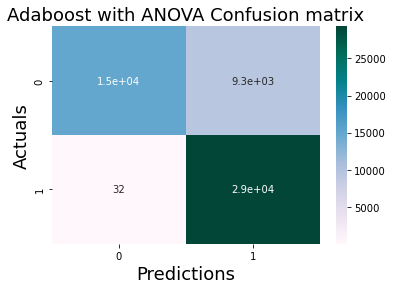

              precision    recall  f1-score   support

           0       1.00      0.62      0.76     24273
           1       0.76      1.00      0.86     29342

    accuracy                           0.83     53615
   macro avg       0.88      0.81      0.81     53615
weighted avg       0.87      0.83      0.82     53615



In [30]:
draw_CM_AND_Make_Classification_report(y_test,y_predict_adabost_ANOVA,"Adaboost with ANOVA Confusion matrix")

In [70]:
Accuracies=[ 0.80 , 0.83,0.83,0.80,0.82,0.83,0.80,0.83,0.83  ]
recalls_class_1=[0.94,1.0,1.0,0.95, 1.0, 1.0,0.94,1.0,1.0 ]
precisions=[0.76, 0.76, 0.76, 0.75, 0.76 ,0.76, 0.76 ,0.76 ,0.76 ]
Models=['LR_Chi_Squre','DT_Chi_Squre','Adaboost_Chi_Squre','LR_Mutual_Info','DT_Mutual_Info','Adaboost_Mutual_Info','LR_ANOVA', 'DT_ANOVA','Adaboost_ANOVA']

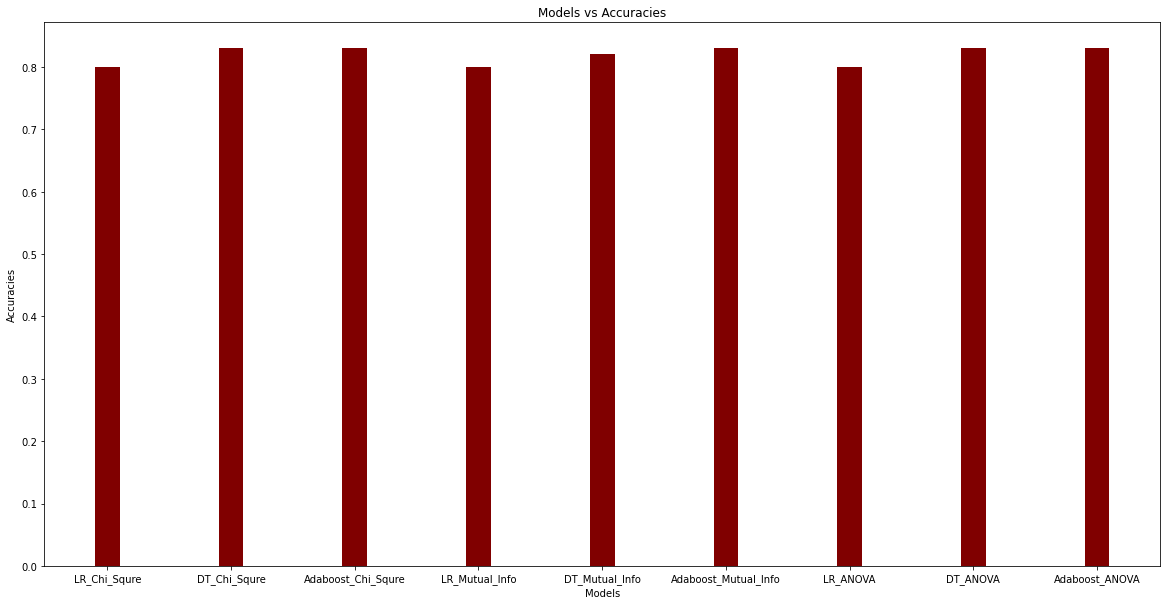

In [41]:

import numpy as np
import matplotlib.pyplot as plt
 
  
# creating the dataset
data = {'LR_Chi_Squre':0.80, 'DT_Chi_Squre':0.83, 'Adaboost_Chi_Squre':0.83,'LR_Mutual_Info':0.80,
        'DT_Mutual_Info':0.82, 'Adaboost_Mutual_Info':0.83, 'LR_ANOVA':0.80,'DT_ANOVA':0.83 ,'Adaboost_ANOVA':0.83}
Models = list(data.keys())
Accuracies= list(data.values())
  
fig = plt.figure(figsize = (20, 10))
 
# creating the bar plot
plt.bar(Models, Accuracies, color ='maroon',
        width = 0.2)
 
plt.xlabel("Models")
plt.ylabel("Accuracies")
plt.title("Models vs Accuracies")
plt.show()

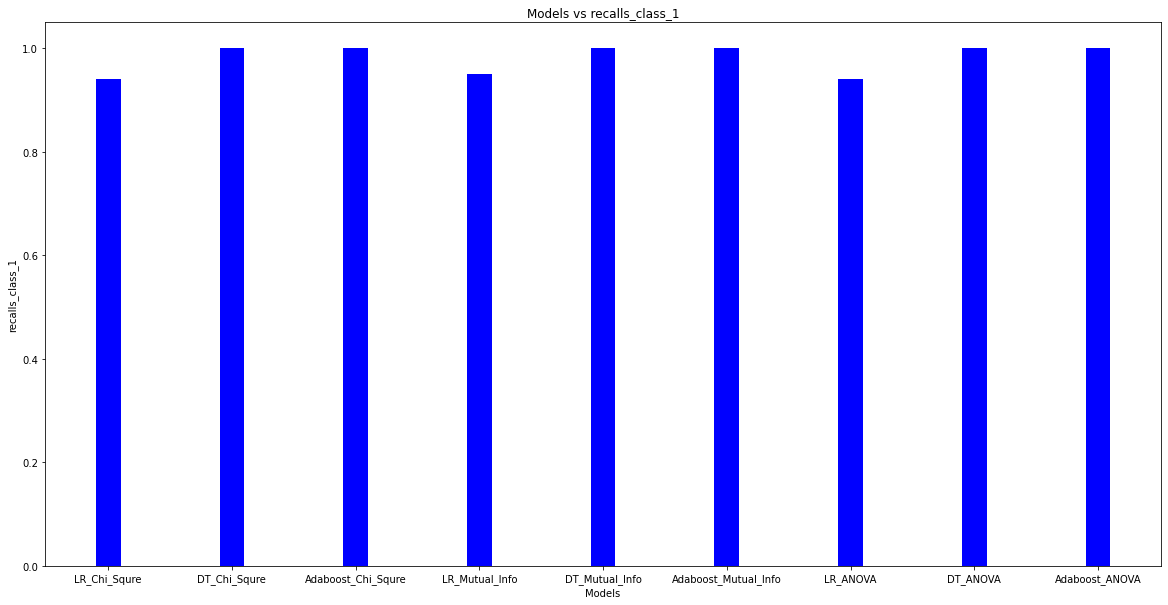

In [38]:

import numpy as np
import matplotlib.pyplot as plt
 
  
# creating the dataset
data = {'LR_Chi_Squre':0.94, 'DT_Chi_Squre':1.0, 'Adaboost_Chi_Squre':1.0,'LR_Mutual_Info':0.95,
        'DT_Mutual_Info':1.0, 'Adaboost_Mutual_Info':1.0, 'LR_ANOVA':0.94,'DT_ANOVA':1.0 ,'Adaboost_ANOVA':1.0}
Models = list(data.keys())
recalls_class_1= list(data.values())
  
fig = plt.figure(figsize = (20, 10))
 
# creating the bar plot
plt.bar(Models, recalls_class_1, color ='blue',
        width = 0.2)
 
plt.xlabel("Models")
plt.ylabel("recalls_class_1")
plt.title("Models vs recalls_class_1")
plt.show()

## The best compination is adaboost with ANOVA

## Cross Validation

In [52]:
from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import KFold, cross_val_score


adabost_ANOVA = AdaBoostClassifier(n_estimators=500, random_state=0,learning_rate=1.0)

k_folds = KFold(n_splits = 5)

scores = cross_val_score(adabost_ANOVA, X_train_ANOVA, y_train_ANOVA, cv = k_folds)

print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())
print("Number of CV Scores used in Average: ", len(scores))

Cross Validation Scores:  [0.82439616 0.82598154 0.82411639 0.82389878 0.82563417]
Average CV Score:  0.8248054066596451
Number of CV Scores used in Average:  5


## Saving the static model

In [33]:
import pickle
from sklearn.datasets import load_diabetes
pickle.dump(anova_adaboost, open('Staitic_model.pkl', 'wb'))

In [24]:
anova_adaboost

Pipeline(steps=[('selectkbest', SelectKBest(k=5)),
                ('adaboostclassifier',
                 AdaBoostClassifier(n_estimators=500, random_state=0))])